In [3]:
# Import modules
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

# Configure inline mode
%matplotlib inline

# 1. Data

In [4]:
# read dataset
dat=pd.read_csv(r"C:\Users\yy63t\Desktop\homework 10\ToyotaCorolla.CSV")
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
dat.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [6]:
# summary statistics
dat.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


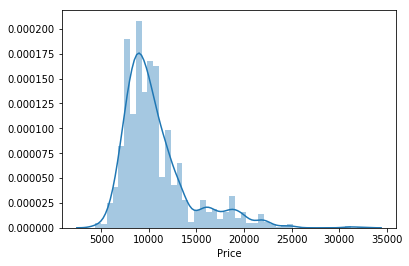

In [7]:
# Distribution of the Price
sb.distplot(dat['Price'])

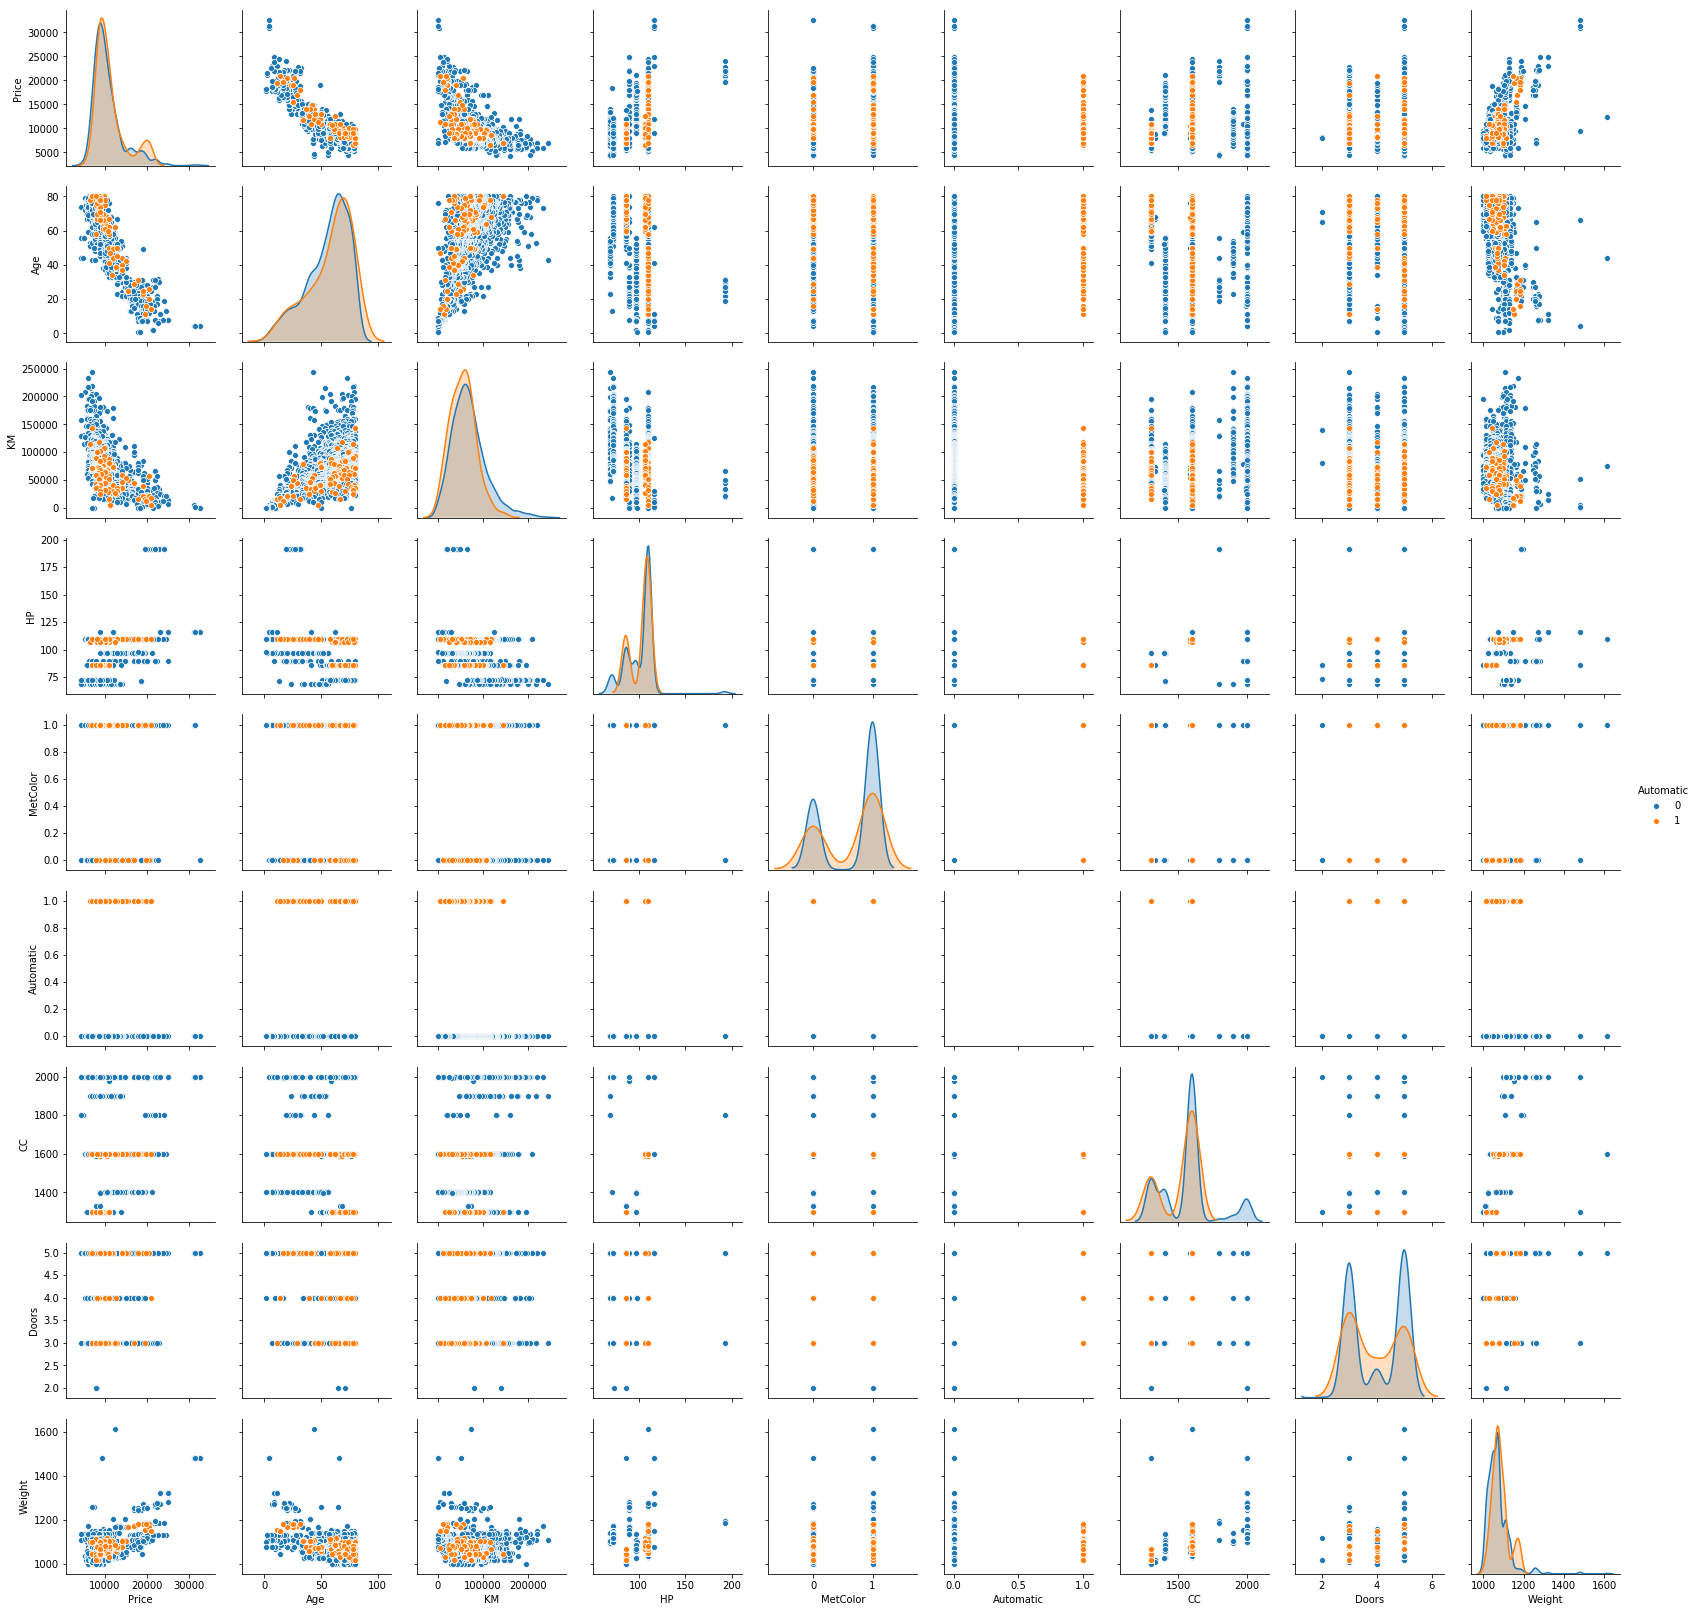

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Scatterplot matrix
sb.pairplot(dat, hue="Automatic")

From the scatter plot matrix, we can see that there is a negative relationship between Age and Price.

From the scatter plot matrix, we also can see that there is no linear relationship between Cc and Price.

# 2. Data Preprocessing

Prepare X and Y.

In [9]:
dat['FuelType'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

In [10]:
Y=dat['Price']

#FuelType is categorical variable, and it has more than 2 categories, transform it into dummy variable.
X=pd.concat([dat,pd.get_dummies(dat['FuelType'])],axis=1)
X=X.drop(['Price','FuelType','CNG'],axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Age          1436 non-null int64
KM           1436 non-null int64
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
Diesel       1436 non-null uint8
Petrol       1436 non-null uint8
dtypes: int64(8), uint8(2)
memory usage: 92.6 KB


In [12]:
X.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol
0,23,46986,90,1,0,2000,3,1165,1,0
1,23,72937,90,1,0,2000,3,1165,1,0
2,24,41711,90,1,0,2000,3,1165,1,0
3,26,48000,90,0,0,2000,3,1165,1,0
4,30,38500,90,0,0,2000,3,1170,1,0


From the above scatter plot matrix, the linear relationship between KM and Price is not obvious. Thus we need to check the detailed relationship between KM and Price. It is useful to draw a scatter plot between these two variables with a linear regression line.

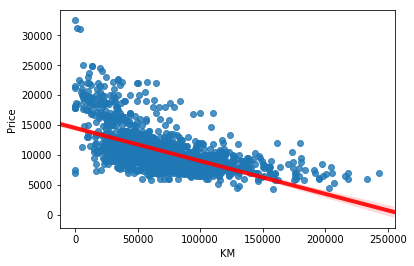

In [13]:
# draw a scatter plot with linear regression line
sb.regplot(x="KM", y="Price", line_kws={"color":"r","alpha":0.9,"lw":4}, data=dat)

We can see that the relationship between KM and Price is not linear. Then we can use a lowess smooth to approximate the non-linear relationship.

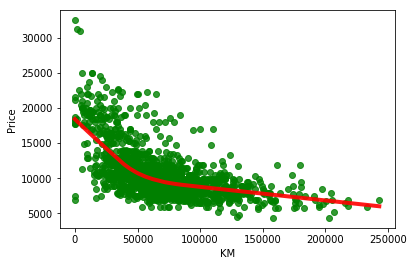

In [14]:
# draw a scatter plot with lowess smooth
sb.regplot(x="KM", y="Price", lowess=True, line_kws={"color":"r","alpha":0.9,"lw":4}, color='green', data=dat)

From the above plot, we can add a quadratic term of KM, which enables us to use polynomial regression to model the non-linear relationship between KM and Price.

In [15]:
# add quadratic term of KM
X['KM2']=X['KM']**2

In [16]:
# add constant term
X['Const']=1

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
Age          1436 non-null int64
KM           1436 non-null int64
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
Diesel       1436 non-null uint8
Petrol       1436 non-null uint8
KM2          1436 non-null int64
Const        1436 non-null int64
dtypes: int64(10), uint8(2)
memory usage: 115.1 KB


In [18]:
X.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol,KM2,Const
0,23,46986,90,1,0,2000,3,1165,1,0,2207684196,1
1,23,72937,90,1,0,2000,3,1165,1,0,5319805969,1
2,24,41711,90,1,0,2000,3,1165,1,0,1739807521,1
3,26,48000,90,0,0,2000,3,1165,1,0,2304000000,1
4,30,38500,90,0,0,2000,3,1170,1,0,1482250000,1


# 3. Multiple Linear Regression


# 3.1 Fit a Linear Model Using Statsmodels Package

In [19]:
# fit a full model
mod_full=sm.OLS(Y,X).fit()

In [20]:
# summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     864.0
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:04:19   Log-Likelihood:                -12344.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1424   BIC:                         2.477e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -120.1513      2.759    -43.543      0.000    -125.564    -114.738
KM            -0.0225      0.003     -6.613      0.000      -0.029      -0.016
HP            61.5913      5.763     10.688      0.000      50.287      72.896
MetColor      66.3263     74.997      0.884      0.377     -80.791     213.444
Automatic    320.9626    156.996      2.044      0.041      12.995     628.930
CC            -4.2073      0.545     -7.721      0.000      -5.276      -3.138
Doors         -6.8367     40.024     -0.171      0.864     -85.349      71.676
Weight        19.9368      1.203     16.579      0.000      17.578      22.296
Diesel      3415.9398    518.400      6.589      0.000    2399.029    4432.850
Petrol      1148.7978    332.304      3.457      0.001     496.939    1800.656
KM2         3.449e-08   1.71e-08      2.012      0.044    8.69e-10    6.81e-08
Const      -3668.6967   1304.356     -2.813      0.005   -6227.362   -1110.032
==============================================================================
Omnibus:                      278.043   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2776.066
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                       9.707   Cond. No.                     3.51e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that:

- Age has a negative effect on Price. Under controlling other factors, increasing 1 unit in age could decrease price by about 120 units. As P<0.001, the negative effect is statistically significant.


- The coefficient of fuel type Diesel is estimated about 3416. It means that a car consuming Diesel has average a higher price (i.e., 3416 more units) than a car consuming CNG (the base fuel type) under controlling other factors.


- As P>0.05, MetColor and Door do not have statistically significant effects on Price.

# 3.2 Multiple Linear Regression Excluding Insignificant Predictors

In [21]:
# drop insignificant predictor, MetColor
mod_refined1=sm.OLS(Y,X.drop(['MetColor'],axis=1)).fit()

#summarize model
mod_refined1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     950.5
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:30:49   Log-Likelihood:                -12344.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1425   BIC:                         2.477e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -120.3373      2.751    -43.741      0.000    -125.734    -114.941
KM            -0.0224      0.003     -6.582      0.000      -0.029      -0.016
HP            61.4686      5.761     10.671      0.000      50.168      72.769
Automatic    318.7226    156.963      2.031      0.042      10.819     626.626
CC            -4.1839      0.544     -7.688      0.000      -5.251      -3.116
Doors         -4.7173     39.949     -0.118      0.906     -83.083      73.648
Weight        19.9290      1.202     16.574      0.000      17.570      22.288
Diesel      3395.9730    517.869      6.558      0.000    2380.106    4411.841
Petrol      1141.0535    332.163      3.435      0.001     489.472    1792.635
KM2         3.357e-08   1.71e-08      1.962      0.050     1.3e-11    6.71e-08
Const      -3631.9769   1303.595     -2.786      0.005   -6189.148   -1074.806
==============================================================================
Omnibus:                      278.436   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2770.112
Skew:                          -0.597   Prob(JB):                         0.00
Kurtosis:                       9.699   Cond. No.                     3.51e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that Doors is still insignificant, as P>0.05.


In [22]:
# drop insignificant predictor, Doors
mod_refined2=sm.OLS(Y,X.drop(['MetColor','Doors'],axis=1)).fit()

#summarize model
mod_refined2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1057.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:34:18   Log-Likelihood:                -12344.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1426   BIC:                         2.476e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -120.3337      2.750    -43.757      0.000    -125.728    -114.939
KM            -0.0224      0.003     -6.592      0.000      -0.029      -0.016
HP            61.6032      5.645     10.914      0.000      50.531      72.676
Automatic    320.5978    156.104      2.054      0.040      14.380     626.816
CC            -4.1945      0.537     -7.817      0.000      -5.247      -3.142
Weight        19.8790      1.125     17.667      0.000      17.672      22.086
Diesel      3407.3618    508.633      6.699      0.000    2409.613    4405.110
Petrol      1139.1145    331.643      3.435      0.001     488.555    1789.674
KM2          3.36e-08   1.71e-08      1.965      0.050    5.95e-11    6.71e-08
Const      -3593.4846   1261.743     -2.848      0.004   -6068.557   -1118.412
==============================================================================
Omnibus:                      276.739   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2737.630
Skew:                          -0.593   Prob(JB):                         0.00
Kurtosis:                       9.659   Cond. No.                     3.40e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4. Model Comparison

In [23]:
# Use summary_col() to compare multiple models

from statsmodels.iolib.summary2 import summary_col
reg_sum = summary_col([mod_full,
                       mod_refined2,],stars=True)
print(reg_sum)


             Price I       Price II  
-------------------------------------
Age       -120.1513***  -120.3337*** 
          (2.7594)      (2.7500)     
Automatic 320.9626**    320.5978**   
          (156.9957)    (156.1039)   
CC        -4.2073***    -4.1945***   
          (0.5449)      (0.5366)     
Const     -3668.6967*** -3593.4846***
          (1304.3556)   (1261.7434)  
Diesel    3415.9398***  3407.3618*** 
          (518.4005)    (508.6326)   
Doors     -6.8367                    
          (40.0242)                  
HP        61.5913***    61.6032***   
          (5.7627)      (5.6446)     
KM        -0.0225***    -0.0224***   
          (0.0034)      (0.0034)     
KM2       0.0000**      0.0000**     
          (0.0000)      (0.0000)     
MetColor  66.3263                    
          (74.9974)                  
Petrol    1148.7978***  1139.1145*** 
          (332.3042)    (331.6426)   
Weight    19.9368***    19.8790***   
          (1.2026)      (1.1252)     
Standard er

Comparing these two models, we found that model 2 (drop insignificant predictors) is better than full model since it: 

1. maintains the similar adjusted R square;
2. is simpler (with fewer predictors) than others.